In [1]:
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt

# Define folder that contains dataset
DHG_PATH = Path(".") / ".." / "data" / "DHG"
# Define folder that contains raw data
RAW_DATA = DHG_PATH / "raw_txt"
# Define folder to save processed data
PROCESSED_DATA = DHG_PATH / "processed_txt"
# Define file that contains metadata
METADATA_PATH = DHG_PATH / "txt_metadata.csv"

In [2]:
from skimage import filters
from skimage.morphology import disk

mzs_imgs = {}

for i, p in enumerate(list(Path(PROCESSED_DATA).iterdir())):
  p_num = int(p.stem.split("-")[0].replace("HG", ""))
  p_type = p.stem.split("-")[1]
  if p_num in [23, 20, 25, 29, 9, 21, 13, 14, 15]:
    for mz in [790.5543, 885.5541, 834.5420, 788.5514, 774.5577]:
      # Get mzs
      img = np.load(p / "mapped_tic_normalized.npy")
      mzs = np.load(p / "common_mzs.npy")
      # get segmetation
      seg = np.load(p / "segmentation.npy")
      if p_num in [14, 15]:
        sum_img = np.sum(img, axis=2) 
        smooth = filters.median(sum_img, disk(2))
        seg = smooth > filters.threshold_mean(smooth)
      #
      img[seg == 0] = 0
      #
      mzs_imgs[(p_num, p_type, mz)] = img[:, :, mzs == mz]

In [3]:
mzs_s_max_val = {}
mzs_r_max_val = {}

for mz in [790.5543, 885.5541, 834.5420, 788.5514, 774.5577]:
  mzs_s_max_val[mz] = max([np.percentile(img, 99.9) for (p_num, p_type, p_mz), img in mzs_imgs.items() if mz == p_mz and p_type == "s"])
  mzs_r_max_val[mz] = max([np.percentile(img, 99.9) for (p_num, p_type, p_mz), img in mzs_imgs.items() if mz == p_mz and p_type == "r"])

In [4]:
mzs_s_max_val

{790.5543: 0.031513626354293556,
 885.5541: 0.05137541458570039,
 834.542: 0.04296228560477809,
 788.5514: 0.060945827078003945,
 774.5577: 0.017073055305869483}

In [5]:
mzs_r_max_val

{790.5543: 0.024120506855988964,
 885.5541: 0.03541911359146096,
 834.542: 0.029708838245632183,
 788.5514: 0.03503410213360938,
 774.5577: 0.015614787469469264}

In [7]:
mzs_imgs

{(20,
  's',
  790.5543): array([[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        ...,
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]]),
 (20,
  's',
  885.5541): array([[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],
 
        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
     

In [9]:
mzs = [790.5543, 885.5541, 834.5420, 788.5514, 774.5577]
for mz in mzs:
  for p_num in [23, 20, 25, 29, 9, 21, 13, 14, 15]:
    for p_type in ["s", "r"]:
      #
      fig, ax = plt.subplots(1, 1, figsize=(10, 10))

      #
      data = mzs_imgs[(p_num, p_type, mz)]
      
      # Mask the zero values
      masked_data = np.ma.masked_where(data == 0, data)

      # Create the colormap and set black for masked values
      cmap = plt.cm.rainbow
      cmap.set_bad(color='black')

      #
      ax.imshow(masked_data, cmap=cmap, vmin=0, vmax=mzs_s_max_val[mz] if p_type == "s" else mzs_r_max_val[mz])
      
      #
      plt.tight_layout()
      plt.savefig(f"./figures/{mz:.4f}/fig_{p_num}_{p_type}_{mz}.png", dpi=1200, bbox_inches="tight", transparent=True)
      plt.close()

In [7]:
def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=mpl.colormaps[name])
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

In [ ]:
def customize_colorbar(
    cbar: matplotlib.colorbar.Colorbar, number_of_ticks: int = 5,
    tick_params: Dict[str, Union[str, float]] = DEFAULT_TICK_PARAMS,
    label_fontdict: Dict[str, Union[str, float]] = DEFAULT_LABEL_FONTDICT
):
  """
  Customize the color bar in the plot.

  Args:
    cbar (matplotlib.colorbar.Colorbar): The color bar object of the subplot.
    number_of_ticks (int): Number of ticks in the color bar including min, max.
    tick_params (Dict[str, Union[str, float]], optional): Parameters for tick
        customization.
    label_fontdict (Dict[str, Union[str, float]], optional): Font properties
        for tick labels.

  """

  vmin, vmax = cbar.mappable.get_clim()
  vmin_rounded = np.floor(vmin)
  vmax_rounded = np.ceil(vmax)
  ticks = np.linspace(vmin_rounded, vmax_rounded, number_of_ticks)
  ticks = np.unique(np.concatenate(([vmin_rounded], ticks, [vmax_rounded])))
  cbar.set_ticks(ticks)
  cbar.set_ticklabels([f"{int(tick)}" for tick in ticks])
  cbar.mappable.set_clim(vmin_rounded, vmax_rounded)

  cbar.ax.tick_params(**tick_params)
  for label in cbar.ax.get_yticklabels():
    label.set_fontweight(label_fontdict.get('weight'))
    label.set_fontsize(label_fontdict.get('fontsize'))
    label.set_color(label_fontdict.get('color'))

  for spine in cbar.ax.spines.values():
    spine.set_linewidth(DEFAULT_LINE_WIDTH)
    spine.set_color(DEFAULT_COLOR)

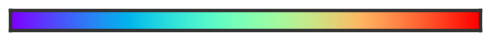

In [17]:
# Define the colormap
cmap = plt.cm.rainbow

# Create a gradient for the colormap
gradient = np.linspace(0, 1, 256).reshape(1, -1)

# Plot the colormap
plt.figure(figsize=(5, 0.5))
cmap = plt.imshow(gradient, aspect='auto', cmap=cmap, extent=[0, 1, 0, 1])


for spine in plt.gca().spines.values():
  spine.set_linewidth(2.5)
  spine.set_color(
  '0.2'
  )

plt.gca().yaxis.set_visible(False)  # Hide the y-axis
plt.gca().xaxis.set_visible(False)  # Hide the x-axis
plt.tight_layout()
plt.savefig(f"./figures/colormap.png", dpi=1200, bbox_inches="tight", transparent=True)
plt.show()

In [37]:
import sys

sys.path.append(".")

import pandas as pd
from pathlib import Path
from classification.binary_classification import load_data

# Get the processed files
processed_files = list(Path(PROCESSED_DATA).iterdir())

# Read metadata csv
metadata_df = pd.read_csv(METADATA_PATH)

# Load the data
(
    spectras, file_names, sample_file_names, sample_numbers, sample_types,
    who_grades
) = load_data(processed_files, metadata_df)


best_pred_r = np.load("analysis/dhg/classification/logistic_regression/seed_9753/predicted_probabilities_r.npy")
best_pred_s = np.load("analysis/dhg/classification/logistic_regression/seed_1963/predicted_probabilities_s.npy")
best_pred_rs = np.load("analysis/dhg/classification/logistic_regression/seed_971/predicted_probabilities_rs.npy")
best_pred_sr = np.load("analysis/dhg/classification/logistic_regression/seed_1760/predicted_probabilities_sr.npy")


In [40]:
lst = [
    "HG 1-r", "HG 1-s", "HG 2-r", "HG 2-s", "HG 3-r", "HG 3-s", "HG 4-r", "HG 4-s",
    "HG 5-r", "HG 5-s", "HG 6_1-r", "HG 6_2-r", "HG 6-s", "HG 7-r", "HG 7-s", "HG 8-r", 
    "HG 8-s", "HG 9-r", "HG 9-s", "HG 10-r", "HG 10-s", "HG 11-r", "HG 11_1-s", 
    "HG 11_2-s", "HG 12-r", "HG 12_1-s", "HG 12_2-s", "HG 13-r", "HG 13-s", 
    "HG 14-r", "HG 14-s", "HG 15-r", "HG 15-s", "HG 16-r", "HG 16-s", "HG 18_1-r", 
    "HG 18_2-r", "HG 18-s", "HG 19-r", "HG 19-s", "HG 20-r", "HG 20-s", "HG 21-r", 
    "HG 21-s", "HG 23-r", "HG 23-s", "HG 25-r", "HG 25-s", "HG 29-r", "HG 29-s"
]

pred_df = pd.DataFrame({"Sample Label" : lst})
pred_df["DNN Mean Probability Classification"] = -np.inf
pred_df["DNN Median Probability Classification"] = -np.inf

cross_pred_df = pd.DataFrame({"Sample Label" : lst})
cross_pred_df["DNN Mean Probability Classification"] = -np.inf
cross_pred_df["DNN Median Probability Classification"] = -np.inf

In [35]:
sample_file_names_r = sample_file_names[sample_types == 'replica']
sample_file_names_s = sample_file_names[sample_types == 'section']

for sample_file_name in np.unique(sample_file_names_r):
  pred_df.loc[pred_df["Sample Label"] == sample_file_name, "DNN Mean Probability Classification"] = np.round(np.mean(best_pred_r[sample_file_names_r == sample_file_name]), 3)
  pred_df.loc[pred_df["Sample Label"] == sample_file_name, "DNN Median Probability Classification"] = np.round(np.median(best_pred_r[sample_file_names_r == sample_file_name]), 3)

for sample_file_name in np.unique(sample_file_names_s):
  pred_df.loc[pred_df["Sample Label"] == sample_file_name, "DNN Mean Probability Classification"] = np.round(np.mean(best_pred_s[sample_file_names_s == sample_file_name]), 3)
  pred_df.loc[pred_df["Sample Label"] == sample_file_name, "DNN Median Probability Classification"] = np.round(np.median(best_pred_s[sample_file_names_s == sample_file_name]), 3)

In [41]:
for sample_file_name in np.unique(sample_file_names_r):
  cross_pred_df.loc[cross_pred_df["Sample Label"] == sample_file_name, "DNN Mean Probability Classification"] = np.round(np.mean(best_pred_sr[sample_file_names_r == sample_file_name]), 3)
  cross_pred_df.loc[cross_pred_df["Sample Label"] == sample_file_name, "DNN Median Probability Classification"] = np.round(np.median(best_pred_sr[sample_file_names_r == sample_file_name]), 3)

for sample_file_name in np.unique(sample_file_names_s):
  cross_pred_df.loc[cross_pred_df["Sample Label"] == sample_file_name, "DNN Mean Probability Classification"] = np.round(np.mean(best_pred_rs[sample_file_names_s == sample_file_name]), 3)
  cross_pred_df.loc[cross_pred_df["Sample Label"] == sample_file_name, "DNN Median Probability Classification"] = np.round(np.median(best_pred_rs[sample_file_names_s == sample_file_name]), 3)

In [42]:
cross_pred_df

,Sample Label,DNN Mean Probability Classification,DNN Median Probability Classification
0,HG 1-r,0.000,0.000
1,HG 1-s,0.066,0.000
2,HG 2-r,0.500,0.500
3,HG 2-s,0.340,0.235
4,HG 3-r,0.500,0.500
5,HG 3-s,0.798,0.888
6,HG 4-r,0.500,0.500
7,HG 4-s,0.877,0.973
8,HG 5-r,0.499,0.499
9,HG 5-s,0.880,0.990
